# Substation EDA
- exploring the California substation data (with coordinates!)
- source: https://databasin.org/datasets/cb9ff78949db409f83d4d6ca38f707bf/ 
- goal: to be used for ER 131 final project research question 2, predicting chance of getting off queue given location

In [ ]:
import geopandas as gpd
import fiona #j to list the layers in the gdb file to know which one to use when reading w geopandas
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx #for basemaps

In [8]:
path = 'data/substations.gdb'
fiona.listlayers(path)

['CA_Substations_Final']

In [55]:
subs = gpd.read_file(path, layer = 'CA_Substations_Final')
subs.head()

,Owner,Path,Source,Type,HIFLD_ID,Name,Max_Voltage,ZIP_CODE,STATE,COUNTY,CITY,Lon,Lat,geometry
0,Other,None,CEC,SUBSTATION,310025,Jenney,115.0,94501,CA,Alameda County,Alameda,-122.242916,37.772436,POINT (-13608019.183 4547328.302)
1,PG&E,None,CEC,SUBSTATION,306474,Corona,115.0,94954,CA,Sonoma County,Petaluma,-122.657369,38.265013,POINT (-13654155.807 4616931.161)
2,PG&E,None,CEC,SUBSTATION,310124,South Bay 1,NaN,94514,CA,Alameda County,Unincorporated,-121.625951,37.778482,POINT (-13539338.971 4548179.784)
3,PG&E,None,CEC,SUBSTATION,306256,Altamont,60.0,94551,CA,Alameda County,Unincorporated,-121.677208,37.748377,POINT (-13545044.874 4543940.58)
4,PG&E,None,CEC,SUBSTATION,303892,Castro Valley,230.0,94546,CA,Alameda County,Unincorporated,-122.061277,37.691281,POINT (-13587799.245 4535905.499)


## Ugly graph

<function matplotlib.pyplot.show(close=None, block=None)>

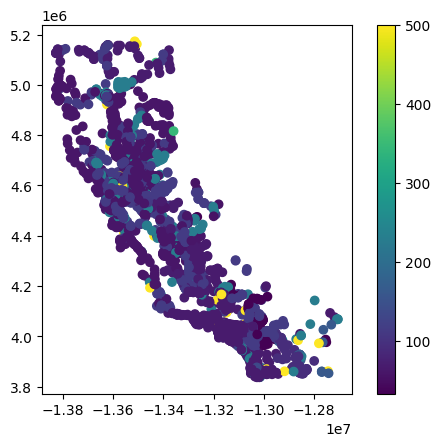

In [35]:
ax = subs.plot(column = 'Max_Voltage', legend = True)
plt.show

In [40]:
counties = gpd.read_file('data/ca_counties')
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2.468695e+09,2.329911e+07,+39.5769252,-120.5219926,375602.758281,4.200450e+09,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2.499984e+09,7.542543e+07,+38.4500161,-121.3404408,406584.174167,4.205516e+09,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7.084063e+09,2.729752e+09,+34.5370572,-120.0399729,891686.747247,1.449841e+10,"MULTIPOLYGON (((-13440081.316 4150394.004, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2.641785e+09,4.384187e+07,+38.1838996,-120.5614415,367005.879680,4.356213e+09,"POLYGON ((-13428575.483 4627725.227, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4.771988e+09,9.473454e+08,+34.3587415,-119.1331432,527772.242190,8.413293e+09,"MULTIPOLYGON (((-13283668.94 4059436.934, -132..."


## Beautiful amazing graph
- i added a county shp file (https://data.ca.gov/dataset/ca-geographic-boundaries) so we could see which county each substation belongs to
- dont know a good way to label them tho bc the legend gets hella inflated (takes up the entire screen)
- maybe i shd make the map bigger...

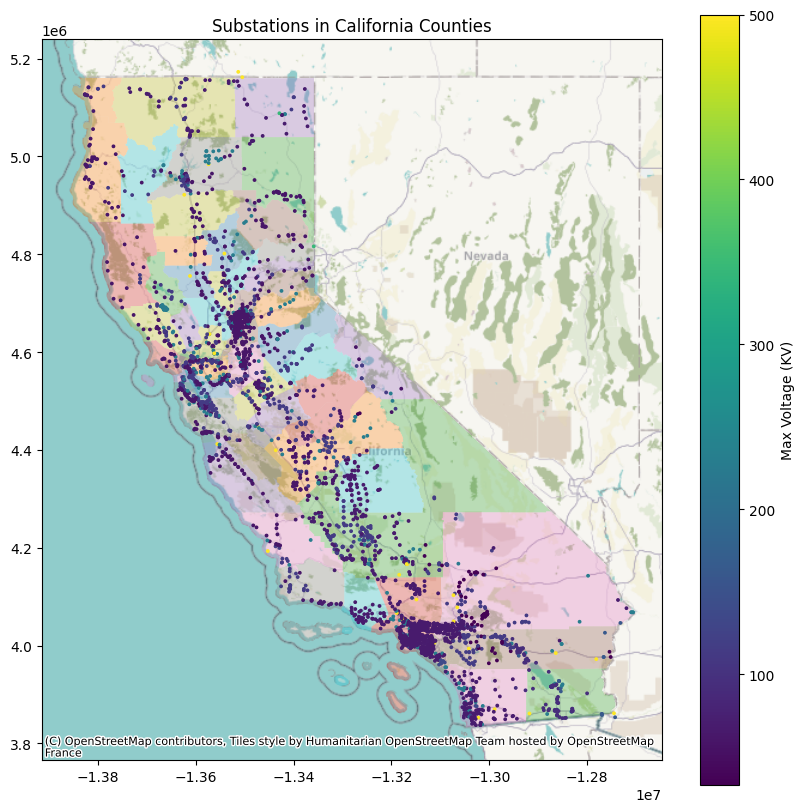

In [60]:
ax2 = counties.plot(column = 'NAME', alpha = 0.3, figsize=(10, 10))
subs.plot(ax = ax2, column = 'Max_Voltage', legend = True, markersize= 3, legend_kwds={"label": "Max Voltage (KV)"})
cx.add_basemap(ax2)
plt.title('Substations in California Counties')
plt.show()